In [1]:
import numpy as np

N =10
xscale=10
#noise
mean = 0
stedv = 1
x = np.random.rand(N)*xscale
noise = np.random.normal(loc=mean,scale=stedv,size=N)
y=x*2+5+noise

In [2]:
def dataGen(N=100,xscale=10,mean=0,stedv=1):
    x = np.random.rand(N)*xscale
    noise = np.random.normal(loc=mean,scale=stedv,size=N)
    y=x*2+5+noise
    return(x,y)

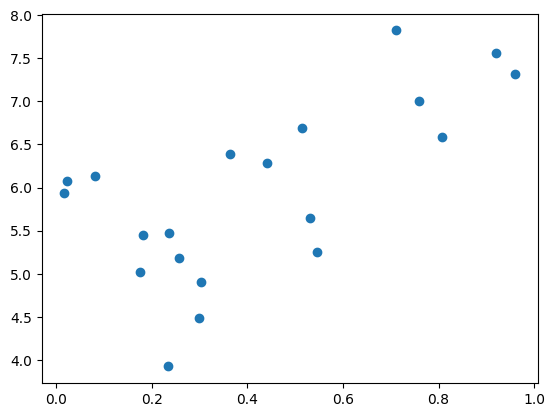

In [3]:
import matplotlib.pyplot as plt

(x,y) = dataGen(20,1)
plt.scatter(x,y)

In [4]:
from sklearn.linear_model import LinearRegression

(x,y) = dataGen(200,1,stedv=0.3)
X=x[:,np.newaxis]
model = LinearRegression()
model.fit(X,y)
print(model.coef_[0],model.intercept_,model.score(X,y))

2.0538737384643992 4.9792014129877735 0.8194263866642982


## Effect of N on coefficients

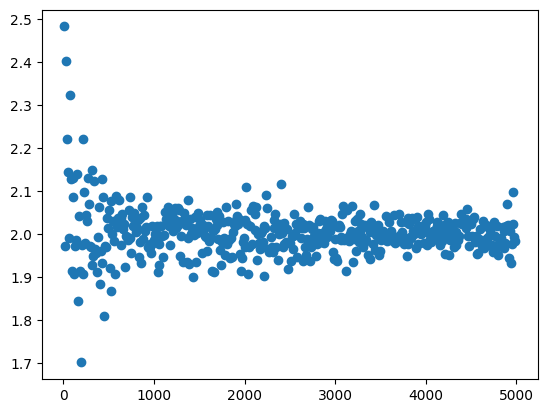

In [5]:
repeats = 5
Ns=np.arange(10,5000,step=10)
coeffs=[]

for N in Ns:
    (x,y) = dataGen(N,1,stedv=0.5)
    X=x[:,np.newaxis]
    coeff = []
    for k in range(repeats):
        model = LinearRegression()
        model.fit(X,y)
        coeff.append(model.coef_)

    coeffs.append(np.mean(coeff))

coeffs=np.array(coeffs)

plt.scatter(Ns,coeffs)
plt.show()

## Effect of noise on coefficients

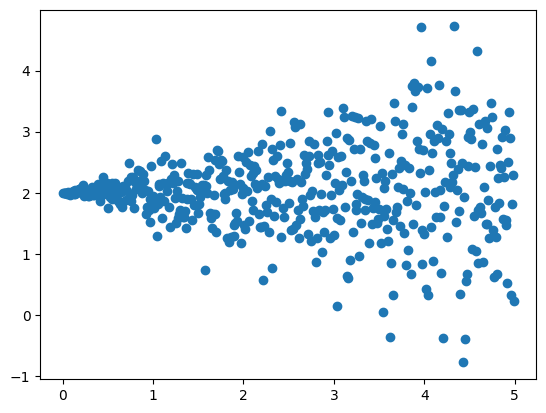

In [6]:
repeats = 5
noises=np.arange(0,5,step=0.01)
coeffs=[]

for noise in noises:
    (x,y) = dataGen(200,1,stedv=noise)
    X=x[:,np.newaxis]
    coeff = []
    for k in range(repeats):
        model = LinearRegression()
        model.fit(X,y)
        coeff.append(model.coef_)

    coeffs.append(np.mean(coeff))

coeffs=np.array(coeffs)

plt.scatter(noises,coeffs)
plt.show()

## Effect of N on R2

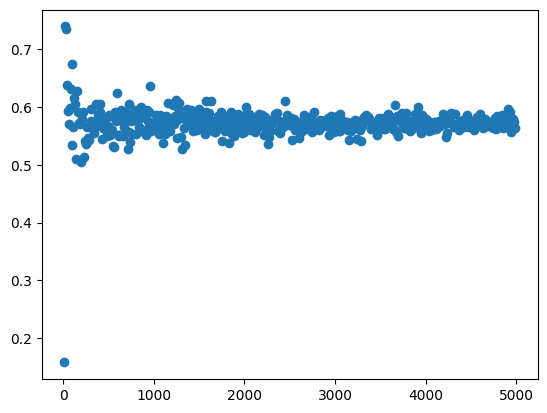

In [7]:
repeats = 5
Ns=np.arange(10,5000,step=10)
scores = []

for N in Ns:
    (x,y) = dataGen(N,1,stedv=0.5)
    X=x[:,np.newaxis]
    score = []
    for k in range(repeats):
        model = LinearRegression()
        model.fit(X,y)
        score.append(model.score(X,y))

    scores.append(np.mean(score))

R2s=np.array(scores)

plt.scatter(Ns,R2s)
plt.show()

## Effect of noise on R2

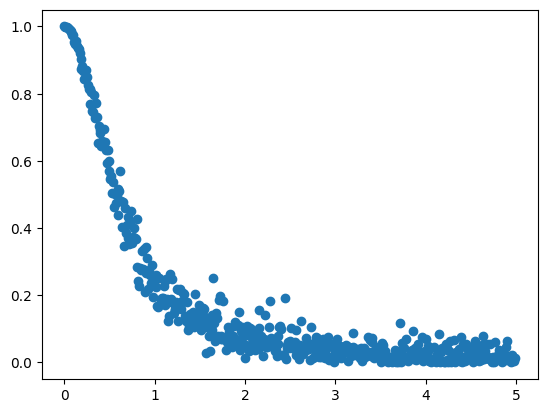

In [8]:
repeats = 5
noises=np.arange(0,5,step=0.01)
scores=[]

for noise in noises:
    (x,y) = dataGen(200,1,stedv=noise)
    X=x[:,np.newaxis]
    score = []
    for k in range(repeats):
        model = LinearRegression()
        model.fit(X,y)
        score.append(model.score(X,y))

    scores.append(np.mean(score))

scores=np.array(scores)

plt.scatter(noises,scores)
plt.show()

# 3 Non-linear function

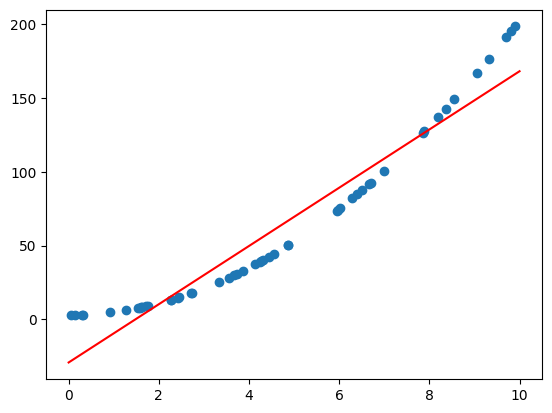

0.9296247387016736


In [9]:
N =50
xscale=10
#noise
mean = 0
stedv = 1
x = np.random.rand(N)*xscale
X = x[:,np.newaxis]
noise = np.random.normal(loc=mean,scale=stedv,size=N)

y = 2*x*x+3

model = LinearRegression()
model.fit(X,y)
b = model.intercept_
m = model.coef_[0]

plt.scatter(X,y)
plt.plot([0,10],[b,m*10+b],color='red')
plt.show()

print(model.score(X,y))

## Random function

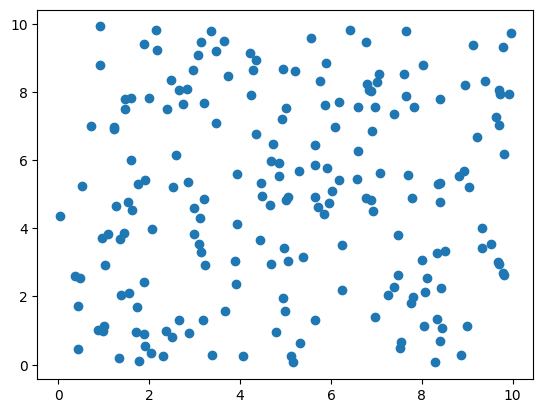

In [10]:
N = 200
xscale = 10
x=np.random.rand(N)*xscale
X=x[:,np.newaxis]
y = np.random.rand(N)*10
plt.scatter(X,y)
plt.show()

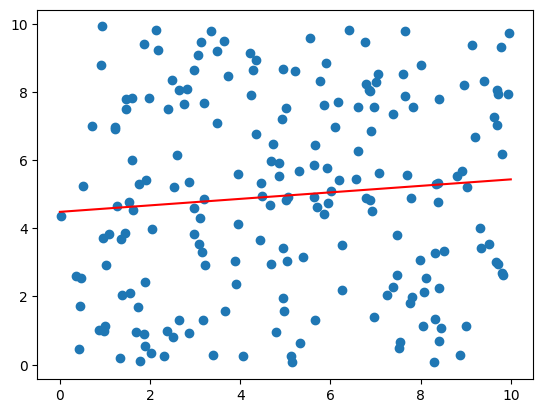

4.482226711885233 0.09528403939092277


In [11]:
model = LinearRegression()
model.fit(X,y)

b = model.intercept_
m=model.coef_[0]

plt.scatter(X,y)
plt.plot([0,10],[b,m*10+b],color='red')
plt.show()

print(b,m)

In [28]:
N = 200
xscale = 10

x1=np.random.rand(N)*xscale
x2=np.random.rand(N)*xscale
X = np.column_stack((x1, x2))

noise = np.random.normal(loc=mean,scale=stedv,size=N)
y=x1*2+noise

model = LinearRegression()
model.fit(X,y)

print(model.coef_)


[1.95517473 0.02843076]


In [30]:
from statsmodels.api import OLS

model = OLS(y,X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          1.531e+04
Date:                Sun, 18 Feb 2024   Prob (F-statistic):                   9.37e-218
Time:                        15:46:01   Log-Likelihood:                         -261.89
No. Observations:                 200   AIC:                                      527.8
Df Residuals:                     198   BIC:                                      534.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------